##Eksplorasi Dataset Adult/Cencus Income

Nama: Divia Shinta Sukarsaatmadja

NIM : 24060121140104

Lab : ML A1

###Deskripsi Dataset

Pada tugas praktikum *machine learning* pertemuan 2 ini, saya memilih dataset "Adult/Cencus Income" yang bersumber dari Kaggle.

Dataset ini merupakan hasil ekstraksi yang dilakukan oleh Barry Becker dari database Sensus 1994. Satu set catatan yang cukup bersih diekstraksi menggunakan kondisi berikut: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). Dataset ini digunakan untuk membuat prediksi apakah seseorang menghasilkan pendapatan melebihi $50K/tahun berdasarkan data sensus.

Informasi detail mengenai dataset ini dapat diakses melalui [tautan berikut.](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset/data)


###Membuat Validasi Dataset

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()


Saving kaggle.json to kaggle (1).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset

adult-income-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q adult-income-dataset.zip

replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
!pip install pandas


In [235]:
import pandas as pd
df = pd.read_csv('/content/adult.csv')
df.head(25)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Kode ini digunakan untuk memuat dataset dari file CSV ke dalam DataFrame Pandas, lalu menampilkan 25 baris pertama dari DataFrame tersebut.

In [236]:
df.shape

(48842, 15)

Kode tersebut (`df.shape`) digunakan untuk menampilkan jumlah baris dan kolom dalam DataFrame `df`.

In [237]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Kode tersebut (`df.isin(['?']).sum()`) digunakan untuk menghitung jumlah nilai yang bersifat `'?'` dalam setiap kolom dataset `df`. Outputnya akan memberikan informasi tentang jumlah nilai yang kosong atau tidak diketahui (diwakili oleh `'?'`) dalam setiap kolom.

In [238]:
import numpy as np
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

Kode tersebut diatas digunakan untuk menggantikan nilai yang bersifat `'?'` dengan `np.nan` (nilai kosong) dalam kolom-kolom tertentu, yaitu 'workclass', 'occupation', dan 'native-country'. Ini adalah langkah pra-pemrosesan data untuk menangani nilai yang hilang atau tidak diketahui.

In [240]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Sekarang sudah tidak ada nilai yang bersifat '?' dalam setiap kolom DataFrame, seperti yang terlihat dari jumlahnya yang semua nol.

In [241]:
info = pd.DataFrame(df.isnull().sum(), columns=["IsNull"])
info.insert(1, "IsNa", df.isna().sum(), True)
info.insert(2, "Duplicate", df.duplicated().sum(), True)
info.insert(3, "Unique", df.nunique(), True)
info.insert(4, "Min", df.min(numeric_only=True), True)
info.insert(5, "Max", df.max(numeric_only=True), True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0.0,2799.0,0.0,0.0,0.0,0.0,2809.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0
IsNa,0.0,2799.0,0.0,0.0,0.0,0.0,2809.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0
Duplicate,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
Unique,74.0,8.0,28523.0,16.0,16.0,7.0,14.0,6.0,5.0,2.0,123.0,99.0,96.0,41.0,2.0
Min,17.0,NaN,12285.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN
Max,90.0,NaN,1490400.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,99999.0,4356.0,99.0,NaN,NaN


Code di atas membuat DataFrame `info` yang berisi informasi tentang dataset. Berikut penjelasan singkat untuk setiap kolom dalam DataFrame `info`:

1. **IsNull:** Jumlah nilai yang hilang (NaN) dalam setiap kolom.
2. **IsNa:** Jumlah nilai yang hilang (NaN) dalam setiap kolom (sama dengan "IsNull").
3. **Duplicate:** Jumlah baris yang merupakan duplikat dari baris lain dalam dataset.
4. **Unique:** Jumlah nilai unik dalam setiap kolom.
5. **Min:** Nilai minimum dalam setiap kolom (hanya kolom numerik).
6. **Max:** Nilai maksimum dalam setiap kolom (hanya kolom numerik).

DataFrame ini memberikan ringkasan statistik singkat tentang dataset, membantu untuk pemahaman awal tentang distribusi nilai di setiap kolom.

In [242]:
df_copy = df.copy()
df_copy

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Code di atas membuat salinan (copy) dari DataFrame `df` dan menamainya `df_copy`.

In [243]:
df_copy.dropna(how='any',inplace=True)
df_copy

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Code di atas menggunakan metode `dropna` pada DataFrame `df_copy` untuk menghapus baris (rows) yang mengandung nilai-nilai yang hilang (`NaN`). Argumen `how='any'` menunjukkan bahwa baris akan dihapus jika ada setidaknya satu nilai yang hilang di dalamnya. Argumen `inplace=True` digunakan untuk mengaplikasikan perubahan langsung pada DataFrame, sehingga DataFrame `df_copy` akan diubah tanpa perlu membuat salinan baru.

In [244]:
df_copy.shape

(45222, 15)

Code tersebut digunakan untuk menampilkan bentuk (shape) dari DataFrame `df_copy` setelah melakukan penghapusan baris yang mengandung nilai-nilai yang hilang.

In [245]:
df_copy = df_copy.drop_duplicates()
df_copy

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Code tersebut digunakan untuk menghapus baris-baris yang merupakan duplikat dalam DataFrame `df_copy`. DataFrame yang dihasilkan (`df_copy`) tidak lagi memiliki baris yang sama persis, sehingga menghasilkan DataFrame yang hanya berisi baris-baris unik.

In [246]:
df_copy['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

Code tersebut digunakan untuk mendapatkan nilai unik dalam kolom 'education' pada DataFrame `df_copy`.

In [247]:
df_copy['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

Code tersebut digunakan untuk mendapatkan nilai unik dalam kolom 'education-num' pada DataFrame `df_copy`.

Text(0.5, 1.0, 'Histogram')

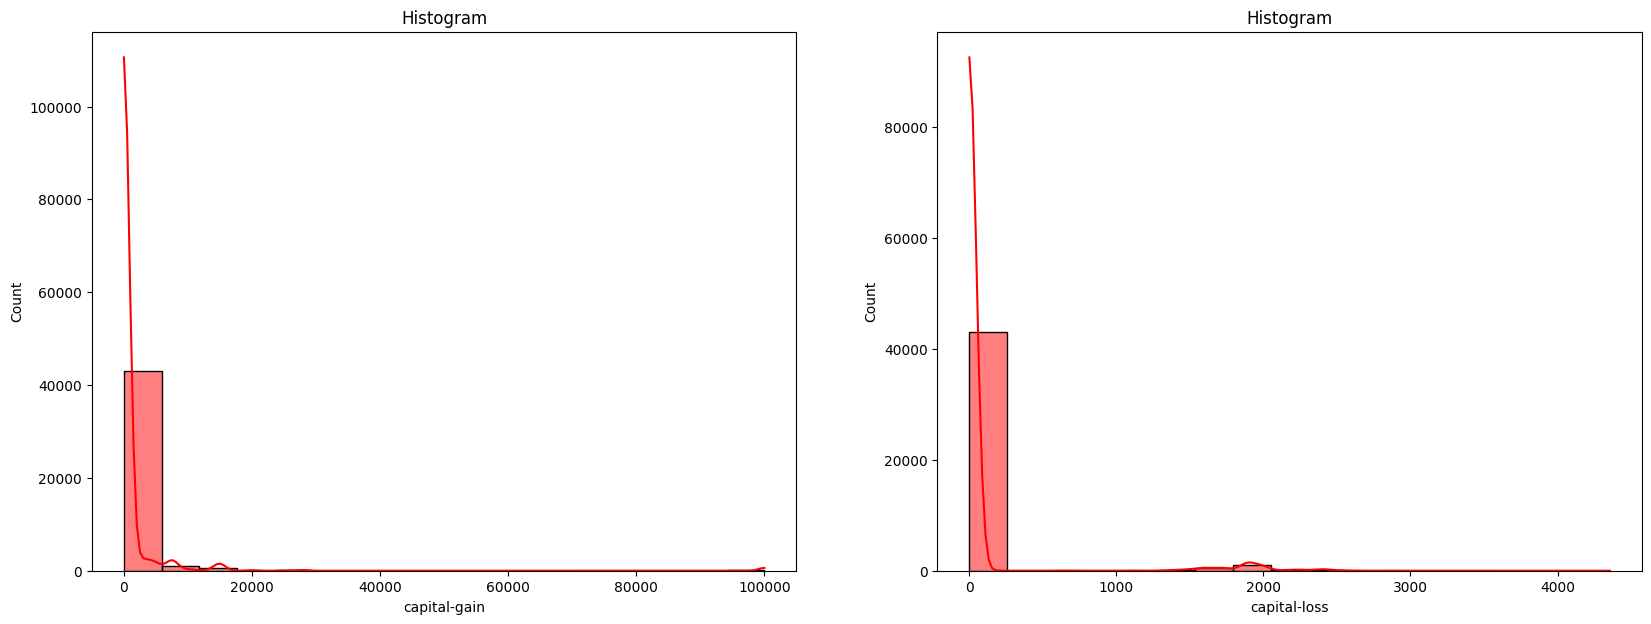

In [248]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df_copy['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df_copy['capital-loss'], kde = True,color='r')
plt.title('Histogram')

Code tersebut digunakan untuk membuat visualisasi histogram dari kolom 'capital-gain' dan 'capital-loss' pada DataFrame `df_copy` menggunakan library seaborn.

In [253]:
df_drop = df_copy.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)
df_drop

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


Code tersebut digunakan untuk menghapus kolom 'educational-num', 'capital-gain', dan 'capital-loss' dari DataFrame `df_copy`. Penggunaan fungsi `drop` dengan argumen `axis=1` mengindikasikan bahwa yang dihapus adalah kolom, dan bukan baris. DataFrame baru tanpa kolom tersebut disimpan dalam variabel `df_drop`.



*   Alasan menghapus kolom 'educational-num' adalah karena informasi yang terkandung di dalamnya sudah mencakup informasi yang ada pada kolom 'education'. Kolom 'education' berisi nilai-nilai dalam bentuk string, sementara 'educational-num' berisi nilai-nilai numerik yang sesuai.

*   Alasan menghapus kolom 'capital-gain' dan 'capital-loss' adalah karena sekitar 75% dari data dalam kedua kolom tersebut memiliki nilai 0.00. Oleh karena itu, informasi yang terkandung dalam kedua kolom tersebut kurang bervariasi dan tidak memberikan kontribusi signifikan terhadap analisis. Sebagai hasilnya, kolom-kolom tersebut dihapus untuk menyederhanakan dataset.

In [254]:
from sklearn import preprocessing

`sklearn.preprocessing` adalah pustaka dalam scikit-learn yang menyediakan alat untuk pra-pemrosesan data sebelum digunakan dalam model machine learning.

In [255]:
label_encoder = preprocessing.LabelEncoder()

df_drop['gender'] = label_encoder.fit_transform(df_drop['gender'])
df_drop['workclass'] = label_encoder.fit_transform(df_drop['workclass'])
df_drop['education'] = label_encoder.fit_transform(df_drop['education'])
df_drop['marital-status'] = label_encoder.fit_transform(df_drop['marital-status'])
df_drop['occupation'] = label_encoder.fit_transform(df_drop['occupation'])
df_drop['relationship'] = label_encoder.fit_transform(df_drop['relationship'])
df_drop['race'] = label_encoder.fit_transform(df_drop['race'])
df_drop['native-country'] = label_encoder.fit_transform(df_drop['native-country'])

df_drop

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,226802,1,4,6,3,2,1,40,38,<=50K
1,38,2,89814,11,2,4,0,4,1,50,38,<=50K
2,28,1,336951,7,2,10,0,4,1,40,38,>50K
3,44,2,160323,15,2,6,0,2,1,40,38,>50K
5,34,2,198693,0,4,7,1,4,1,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,2,12,5,4,0,38,38,<=50K
48838,40,2,154374,11,2,6,0,4,1,40,38,>50K
48839,58,2,151910,11,6,0,4,4,0,40,38,<=50K
48840,22,2,201490,11,4,0,3,4,1,20,38,<=50K


Kode di atas menggunakan `LabelEncoder` dari `sklearn.preprocessing` untuk mengubah nilai-nilai dalam kolom 'gender', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', dan 'income' menjadi bilangan bulat.

In [256]:
# Check For Missing Values
info = pd.DataFrame(df_drop.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df_drop.isna().sum(),True)
info.insert(2,"Duplicate",df_drop.duplicated().sum(),True)
info.insert(3,"Unique",df_drop.nunique(),True)
info.insert(4,"Min",df_drop.min(),True)
info.insert(5,"Max",df_drop.max(),True)
info.T

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,8,8,8,8,8,8,8,8,8,8,8,8
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,<=50K
Max,90,6,1490400,15,6,13,5,4,1,99,40,>50K


Kode di atas digunakan untuk menghasilkan ringkasan statistik tentang dataset setelah dilakukan beberapa proses pra-pemrosesan. Berikut adalah penjelasan singkat untuk setiap baris kode:

- `df_drop.isnull().sum()`: Menghitung jumlah nilai null dalam setiap kolom.
- `df_drop.isna().sum()`: Menghitung jumlah nilai Not a Number (NaN) dalam setiap kolom.
- `df_drop.duplicated().sum()`: Menghitung jumlah baris yang merupakan duplikat.
- `df_drop.nunique()`: Menghitung jumlah nilai unik dalam setiap kolom.
- `df_drop.min()`: Mengambil nilai minimum dalam setiap kolom.
- `df_drop.max()`: Mengambil nilai maksimum dalam setiap kolom.


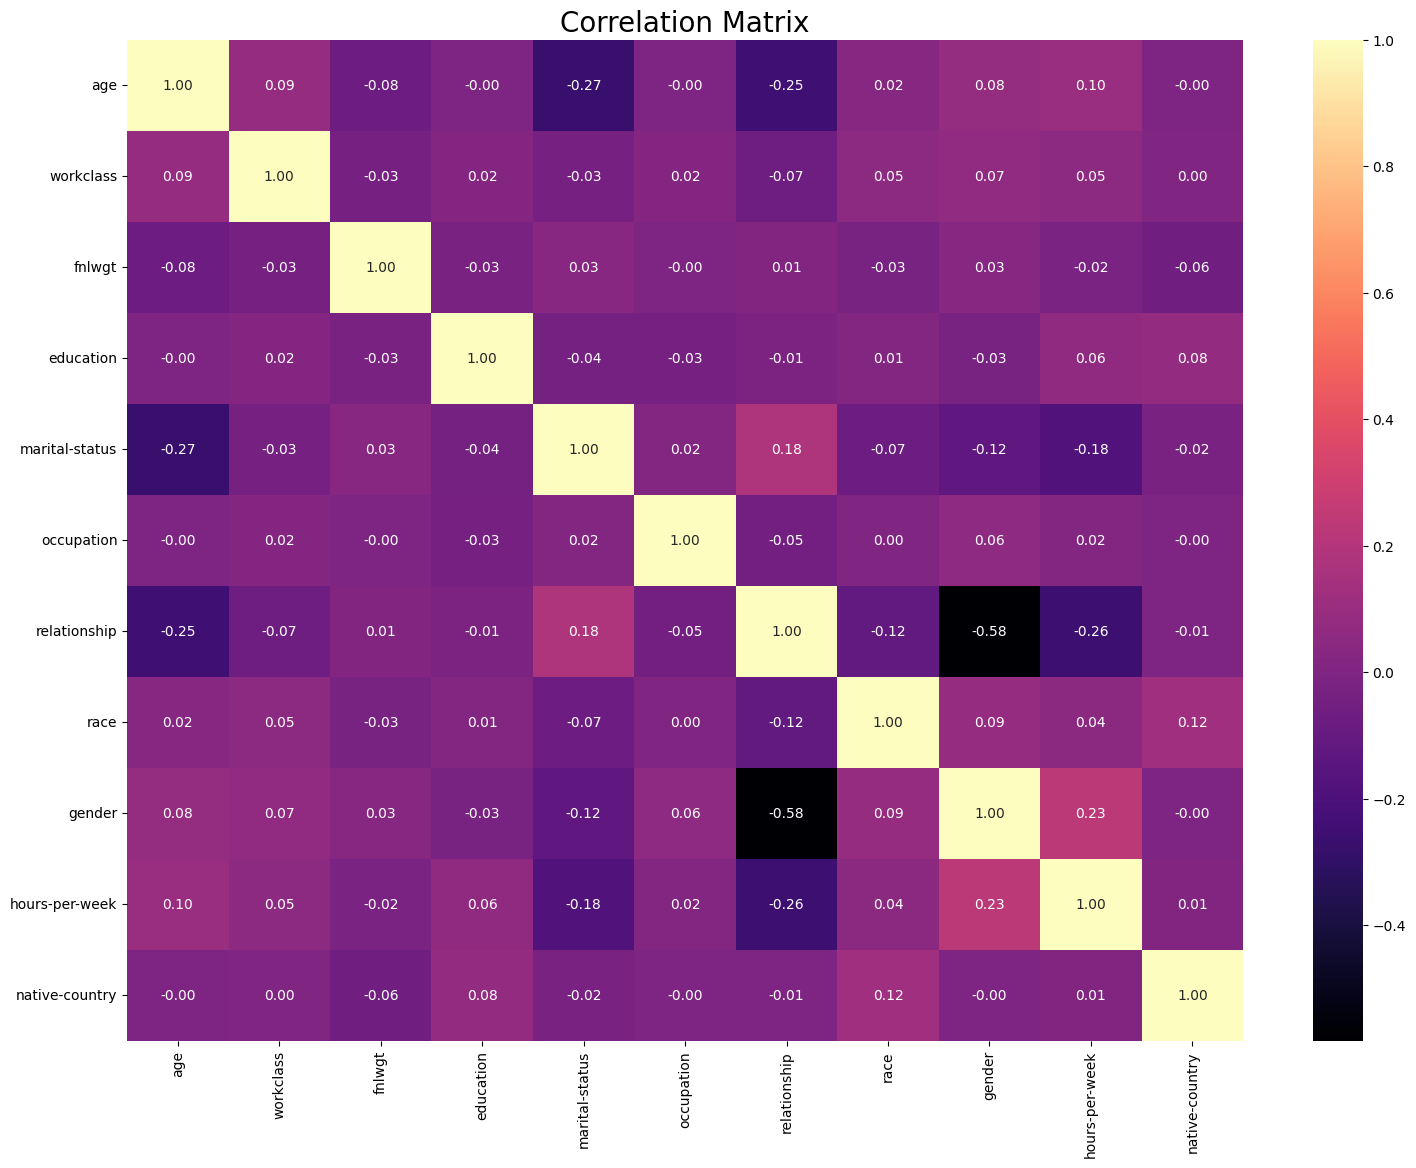

In [257]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df_drop.corr(numeric_only=True), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Kode di atas digunakan untuk membuat dan menampilkan matriks korelasi dari dataset yang telah di-drop kolom tertentu. Berikut adalah penjelasan singkat:

- `df_drop.corr(numeric_only=True)`: Menghitung matriks korelasi antar kolom numerik dalam dataset.
- `sns.heatmap(...)`: Membuat heatmap (peta panas) dari matriks korelasi dengan anotasi nilai dan warna yang ditentukan.
- `ax.set_title(...)`: Menambahkan judul pada heatmap.
- `plt.show()`: Menampilkan heatmap.

Matriks korelasi membantu memvisualisasikan hubungan antar variabel numerik dalam dataset. Nilai korelasi berkisar dari -1 hingga 1, di mana 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi. Peta panas memberikan representasi visual yang baik untuk mengevaluasi korelasi antar variabel.

In [258]:
from sklearn import model_selection
array = df_drop.values

X = array[:,0:11]
Y = array[:,11]

validation_size = 0.20

seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Kode di atas digunakan untuk melakukan pemisahan dataset menjadi dua bagian: data pelatihan (training set) dan data validasi (validation set). Berikut adalah penjelasan singkatnya:

- `array = df_drop.values`: Mengonversi DataFrame menjadi array NumPy.
- `X = array[:, 0:11]`: Memilih kolom 0 hingga 10 (age,	workclass,	fnlwgt,	education,	marital-status,	occupation,	relationship,	race,	gender,	hours-per-week,	native-country) sebagai fitur atau `X`.
- `Y = array[:, 11]`: Memilih kolom 11 (income) sebagai variabel dependen atau target atau `Y`.
- `validation_size = 0.20`: Menentukan proporsi data yang akan dijadikan data validasi, dalam hal ini 20% dari total dataset.
- `seed = 7`: Menentukan seed untuk pengacakan agar hasil dapat direproduksi.
- `X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(...)`: Membagi dataset menjadi data pelatihan dan data validasi dengan proporsi yang telah ditentukan.

In [259]:
print("X_train :", X_train.shape)
print("X_validation :", X_validation.shape)
print("Y_train :", Y_train.shape)
print("Y_validation :", Y_validation.shape)

X_train : (36140, 11)
X_validation : (9035, 11)
Y_train : (36140,)
Y_validation : (9035,)


Kode di atas digunakan untuk mencetak bentuk (shape) dari masing-masing variabel yang telah dibuat, yaitu `X_train`, `X_validation`, `Y_train`, dan `Y_validation`.

###K-Folds Cross Validation

In [260]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

Kode tersebut menetapkan seed untuk reproduktivitas hasil dan memilih metrik evaluasi 'accuracy' untuk mengukur kinerja model klasifikasi.

###Membangun Model

In [261]:
from sklearn.neighbors import KNeighborsClassifier

# Spot Check KNN
knn_model = KNeighborsClassifier()

# Evaluate the KNN model
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
knn_cv_results = model_selection.cross_val_score(knn_model, X_train, Y_train, cv=kfold, scoring=scoring)

# Print the results
knn_msg = "KNN: %f (%f)" % (knn_cv_results.mean(), knn_cv_results.std())
print(knn_msg)


KNN: 0.712452 (0.007896)


Kode tersebut menggunakan K-Nearest Neighbors (KNN) untuk membangun model klasifikasi. Model tersebut dievaluasi menggunakan 10-fold cross-validation, dan hasil akurasi rata-rata dan deviasi standar dicetak.

In [262]:
from sklearn.naive_bayes import GaussianNB

# Spot Check NB
nb_model = GaussianNB()

# Evaluate the NB model
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
nb_cv_results = model_selection.cross_val_score(nb_model, X_train, Y_train, cv=kfold, scoring=scoring)

# Print the results
nb_msg = "NB: %f (%f)" % (nb_cv_results.mean(), nb_cv_results.std())
print(nb_msg)


NB: 0.761926 (0.007082)


Kode di atas menggunakan Gaussian Naive Bayes (NB) untuk membangun model klasifikasi. Model tersebut dievaluasi menggunakan 10-fold cross-validation, dan hasil akurasi rata-rata dan deviasi standar dicetak.

In [263]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the data into a smaller training set to speed up training (adjust the test_size)
X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, test_size=0.1, random_state=seed)

# Spot Check SVM with a smaller training set
svm_model = SVC()

# Evaluate the SVM model
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
svm_cv_results = model_selection.cross_val_score(svm_model, X_train_subset, Y_train_subset, cv=kfold, scoring=scoring)

# Print the results
svm_msg = "SVM: %f (%f)" % (svm_cv_results.mean(), svm_cv_results.std())
print(svm_msg)


SVM: 0.750415 (0.007237)


Kode di atas menggunakan Support Vector Machines (SVM) untuk membangun model klasifikasi. Model tersebut dievaluasi menggunakan 10-fold cross-validation dengan membagi data pelatihan menjadi subset yang lebih kecil terlebih dahulu. Hasil akurasi rata-rata dan deviasi standar kemudian dicetak.

###Memilih Model Terbaik

In [264]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

# Make predictions on the validation set
predictions = nb_model.predict(X_validation)

# Get the unique classes in the true labels and predictions
unique_classes = set(Y_validation) | set(predictions)

# Evaluate and display metrics with zero_division parameter
classification_rep = classification_report(Y_validation, predictions, zero_division=1, labels=list(unique_classes))

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_rep)


0.771776425013835
[[6485  350]
 [1712  488]]
              precision    recall  f1-score   support

       <=50K       0.79      0.95      0.86      6835
        >50K       0.58      0.22      0.32      2200

    accuracy                           0.77      9035
   macro avg       0.69      0.59      0.59      9035
weighted avg       0.74      0.77      0.73      9035



Kode di atas membangun model Naive Bayes menggunakan Gaussian Naive Bayes dari scikit-learn. Model tersebut dilatih dengan menggunakan data pelatihan (`X_train` dan `Y_train`), kemudian diuji pada data validasi (`X_validation`). Metrik evaluasi seperti akurasi, matriks kebingungan (confusion matrix), dan laporan klasifikasi (classification report) dicetak untuk mengevaluasi kinerja model. Untuk mengatasi peringatan `UndefinedMetricWarning`, parameter `zero_division` diatur sebagai 1 dalam laporan klasifikasi.

###Kesimpulan

Berikut adalah kesimpulan yang dapat diambil dari eksplorasi dataset adult:

1. **Pembersihan dan Persiapan Data:**
   - **Handling Missing Values:** Ditemukan beberapa missing values dalam dataset, terutama yang diwakili oleh karakter `'?'`. Untuk kolom-kolom tertentu, missing values digantikan dengan `np.nan` untuk mempermudah pengolahan selanjutnya.
   - **Data Encoding:** Melakukan label encoding pada kolom-kolom kategorikal untuk mengubah nilai-nilai kategorikal menjadi bentuk numerik agar dapat digunakan oleh model machine learning.

2. **Eksplorasi Data:**
   - **Penghapusan Kolom:** Beberapa kolom seperti 'educational-num', 'capital-gain', dan 'capital-loss' dihapus karena kolom-kolom tersebut memiliki hubungan yang sangat erat dengan kolom lain atau sebagian besar data berisi nilai nol.
   - **Label Encoding:** Dilakukan label encoding pada kolom-kolom kategorikal.
   - **Visualisasi:** Melakukan visualisasi histogram pada beberapa kolom untuk memahami distribusi datanya.

3. **Pembuatan Model:**
   - **Train-Test Split:** Data dibagi menjadi subset pelatihan (`X_train`, `Y_train`) dan subset validasi (`X_validation`, `Y_validation`) untuk melatih dan menguji model.
   - **Model Evaluation:** Melakukan evaluasi tiga model machine learning, yaitu K-Nearest Neighbors (KNN), Naive Bayes (NB), dan Support Vector Machines (SVM) menggunakan metrik akurasi.

4. **Hasil Evaluasi Model:**
   - **KNN, Naive Bayes, dan SVM:** Dari hasil evaluasi, ditemukan bahwa model Naive Bayes memberikan akurasi tertinggi dibandingkan dengan KNN dan SVM. Akurasi adalah ukuran sejauh mana model dapat membuat prediksi yang benar, dan dalam konteks ini, model Naive Bayes menunjukkan kinerja yang lebih baik dalam memprediksi kategori target pada dataset tersebut.

Namun, perlu diingat bahwa hasil evaluasi ini hanya berlaku untuk dataset adult dan pemisahan data pelatihan/validasi yang digunakan pada eksplorasi ini. Hasil evaluasi model dapat bervariasi tergantung pada karakteristik dataset, pemilihan fitur, dan cara pemisahan data.